In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
from arabic_reshaper import reshape

In [2]:
data = pd.read_csv('orders.csv')
data.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0


In [31]:
data['DateTime_CartFinalize'] = pd.to_datetime(data['DateTime_CartFinalize'])

data['YearMonth'] = data['DateTime_CartFinalize'].map(lambda date: 100*date.year + date.month)
YearMonth_order = data.groupby(['YearMonth'])['ID_Order'].count().reset_index()
customer_city = data.groupby(['city_name_fa'])['ID_Customer'].nunique().reset_index()
YearMonth_order.head()

,YearMonth,ID_Order
0,201309,6
1,201310,73
2,201311,90
3,201312,116
4,201401,141


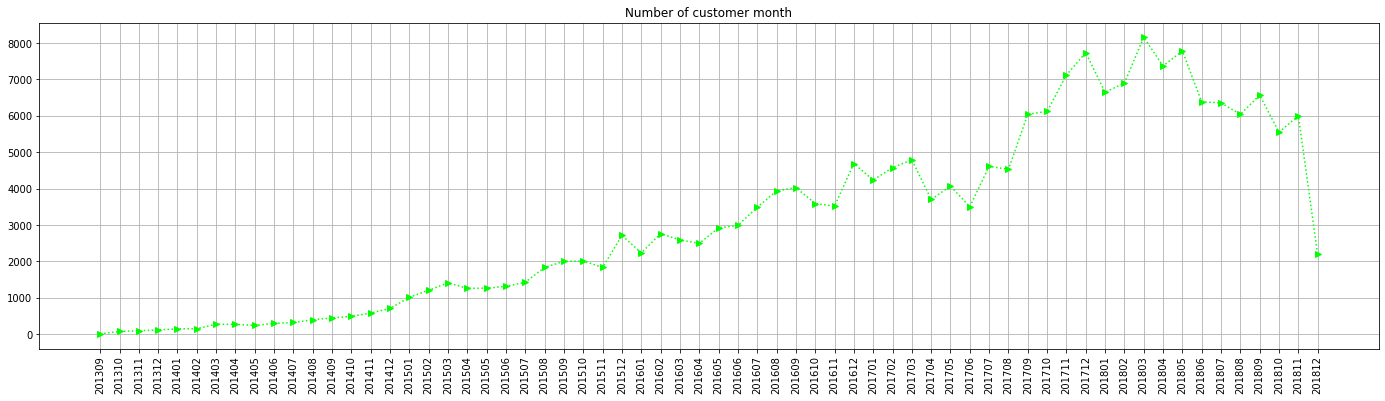

In [70]:
plt.figure(figsize=(24, 6))
plt.plot(YearMonth_order['YearMonth'].to_numpy(dtype=str), YearMonth_order['ID_Order'], marker='>', linestyle = 'dotted', linewidth = '1.5' , color="#00FF00")
plt.grid()
plt.xticks(rotation=90)
plt.title('Number of customer month')
plt.show()

In [49]:
data_cities = data.groupby(['city_name_fa'])['ID_Customer'].nunique().reset_index()
big_costumer = data_cities.sort_values('ID_Customer', ascending=False)        
big_costumer=big_costumer[:10] 
big_costumer

,city_name_fa,ID_Customer
215,تهران,81048
815,کرج,4758
654,مشهد,4674
76,اصفهان,4664
97,اهواز,3353
505,شیراز,3076
355,رشت,2414
202,تبریز,2075
593,قم,1905
818,کرمانشاه,1718


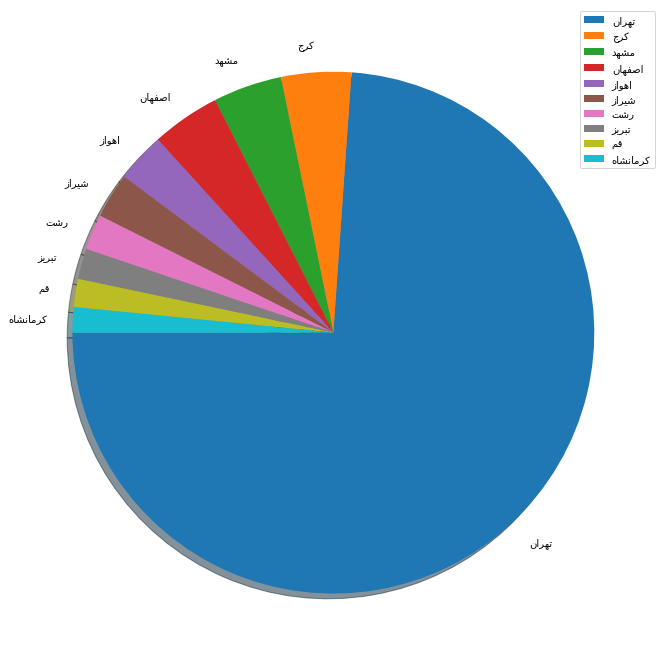

In [62]:
plt.figure(figsize=(12,12))
mylabels = big_costumer['city_name_fa']
mylabels = [get_display(reshape(label)) for label in mylabels]

plt.pie(big_costumer['ID_Customer'],labels=mylabels,shadow = True, startangle = 180)
plt.legend()
plt.show() 